# **1. Perkenalan Dataset**


## Bank Transaction Dataset for Fraud Detection
Dataset ini berisi 2.512 sampel data transaksi yang mencakup atribut transaksi, demografi pelanggan, dan pola penggunaan. Data ini ideal untuk analisis deteksi penipuan dan anomali dalam aktivitas keuangan.


1. **Sumber Dataset**:  
   Kaggle(link yang ada di intruksi submiissions)
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak memiliki label
   - **Jumlah Baris**: Dataset ini memiliki 2512 baris.
   - **Tipe Data**: Dataset mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: misalnya TransactionType Channel, CustomerOccupation.
     - *Numerikal*: misalnya TransactionAmount, TransactionDuration, AccountBalance,CustomerAge, LoginAttempts.

**Ket Features**

*  TransactionID: ID alfanumerik unik untuk setiap transaksi.
* AccountID: ID unik untuk setiap akun, dengan kemungkinan beberapa transaksi per akun.
* TransactionAmount: Nilai moneter setiap transaksi, dari pengeluaran kecil hingga pembelian besar.
* TransactionDate: Stempel waktu transaksi yang mencatat tanggal dan waktu.
* TransactionType: Jenis transaksi dalam kategori 'Kredit' atau 'Debit'.
* Location: Lokasi geografis transaksi, direpresentasikan dengan nama kota di AS.
* DeviceID: ID alfanumerik perangkat yang digunakan untuk transaksi.
* IP Address: Alamat IPv4 terkait transaksi, yang dapat berubah pada beberapa akun.
* MerchantID: ID unik pedagang, menunjukkan pedagang yang sering digunakan atau tidak biasa.
* TransactionDuration: Durasi transaksi dalam detik, bervariasi berdasarkan jenis transaksi.
* LoginAttempts: Jumlah percobaan login sebelum transaksi, di mana nilai tinggi dapat menunjukkan potensi anomali.
* AccountBalance: Saldo akun setelah transaksi, berkorelasi dengan jenis dan jumlah transaksi.
* PreviousTransactionDate: Stempel waktu transaksi sebelumnya untuk menghitung frekuensi transaksi.
* Channel: Saluran transaksi yang digunakan (misalnya, Online, ATM, Cabang).
* CustomerAge: Usia pemilik akun, dengan pengelompokan logis berdasarkan pekerjaan.
* CustomerOccupation: Pekerjaan pemilik akun (misalnya, Dokter, Insinyur, Mahasiswa, Pensiunan), mencerminkan pola pendapatan.




# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [116]:
df = pd.read_csv('bank_transactions_data_2.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [117]:
df_ori = df.copy()

# **4. Exploratory Data Analysis (EDA)**
Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:


- **Memahami Struktur data**

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

Dataset tersebut memiliki 2512 entri dengan 16 kolom. Terdapat 11 kolom yang bertipe data object, 3 kolom int62, dan 2 kolom tipe float64.

- **Mengecek Missing Value**

In [119]:
df.isna().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


Tidak ada missing value pada setiap kolom di dataset tersebut.

- **Analisis Distribusi dan Korelasi**

In [120]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [121]:
df[["TransactionType", "Location", "Channel", "CustomerOccupation"]].describe()

,TransactionType,Location,Channel,CustomerOccupation
count,2512,2512,2512,2512
unique,2,43,3,4
top,Debit,Fort Worth,Branch,Student
freq,1944,70,868,657


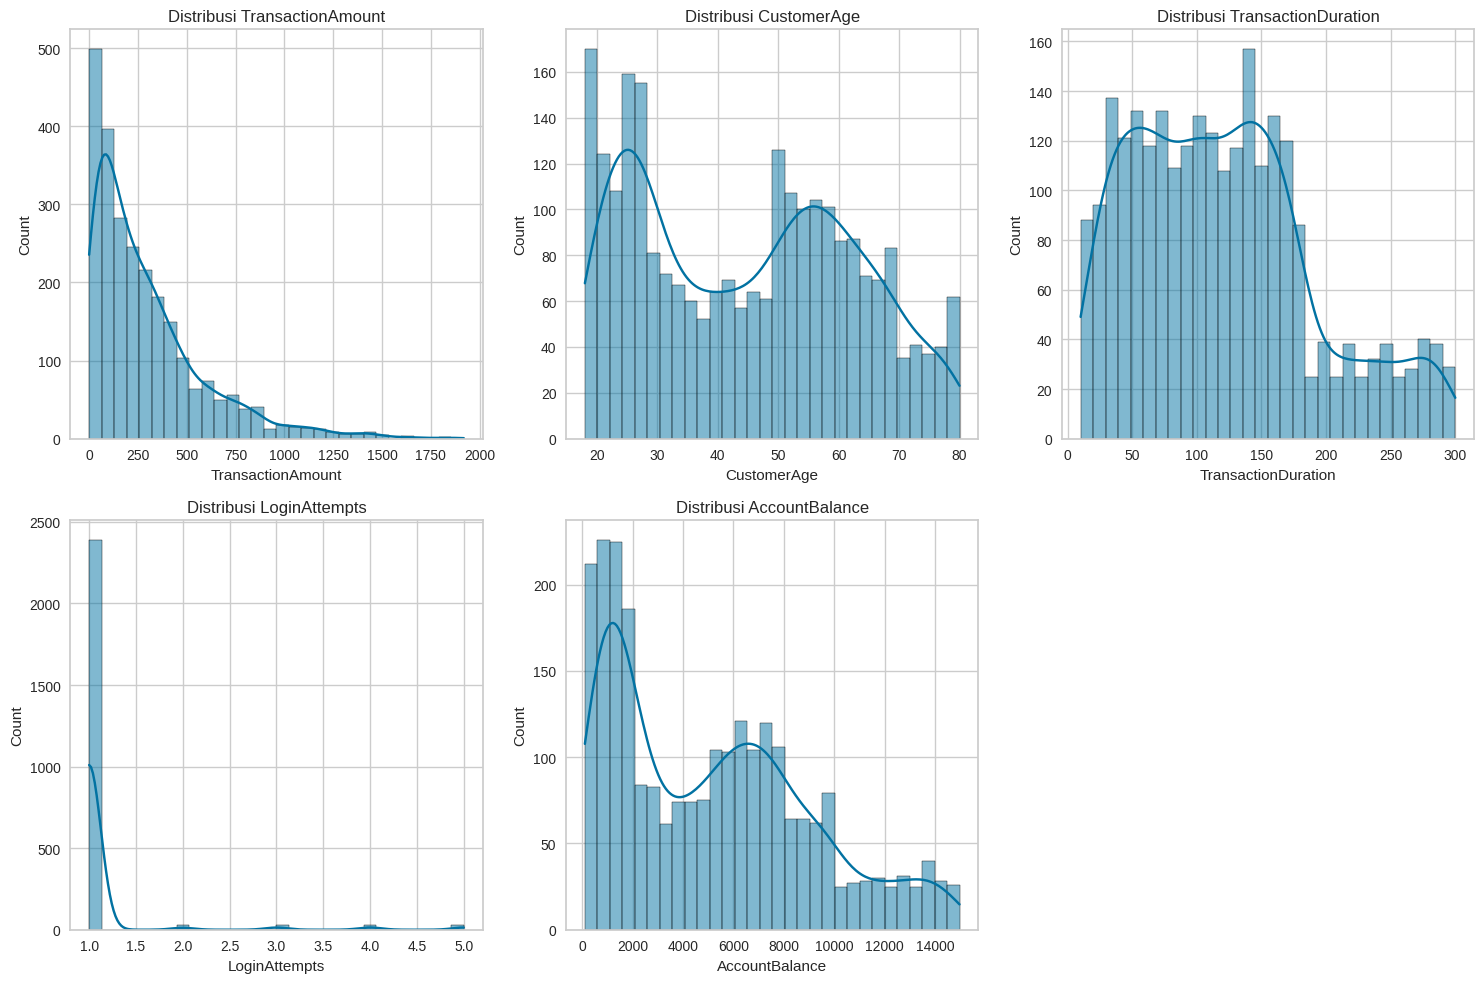

In [122]:
numerical_cols = df.select_dtypes(include=['number'])

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

Berdasarkan hasil visualisasi tersebut disimpulkan bahwa :

- TransactionAmount
  - Distribusi sangat miring ke kanan (skewed right), menunjukkan sebagian besar transaksi memiliki jumlah kecil.
  - Hanya sedikit transaksi dengan jumlah yang besar.

- CustomerAge
  - Distribusi menunjukkan pola bimodal, dengan dua puncak utama sekitar usia 20-30 tahun dan 50-60 tahun.
  - Hal ini menunjukkan adanya dua kelompok usia yang dominan dalam data transaksi.
- TransactionDuration
  - Distribusi cukup merata dengan beberapa puncak di sekitar 50-150 detik.
  - Terlihat ada penurunan jumlah transaksi dengan durasi lebih dari 200 detik.
- LoginAttempts
  - Distribusi sangat tidak merata, dengan sebagian besar pengguna hanya melakukan satu kali login sebelum transaksi.
  - Hanya sedikit kasus dengan percobaan login lebih dari 1 kali, yang bisa menjadi indikasi anomali atau upaya akses yang mencurigakan.

- AccountBalance
  - Distribusi menunjukkan dua puncak utama, sekitar saldo rendah (<2000) dan saldo lebih tinggi (>5000).
  - Ini menunjukkan bahwa ada dua kelompok pelanggan dengan perbedaan saldo yang cukup signifikan.

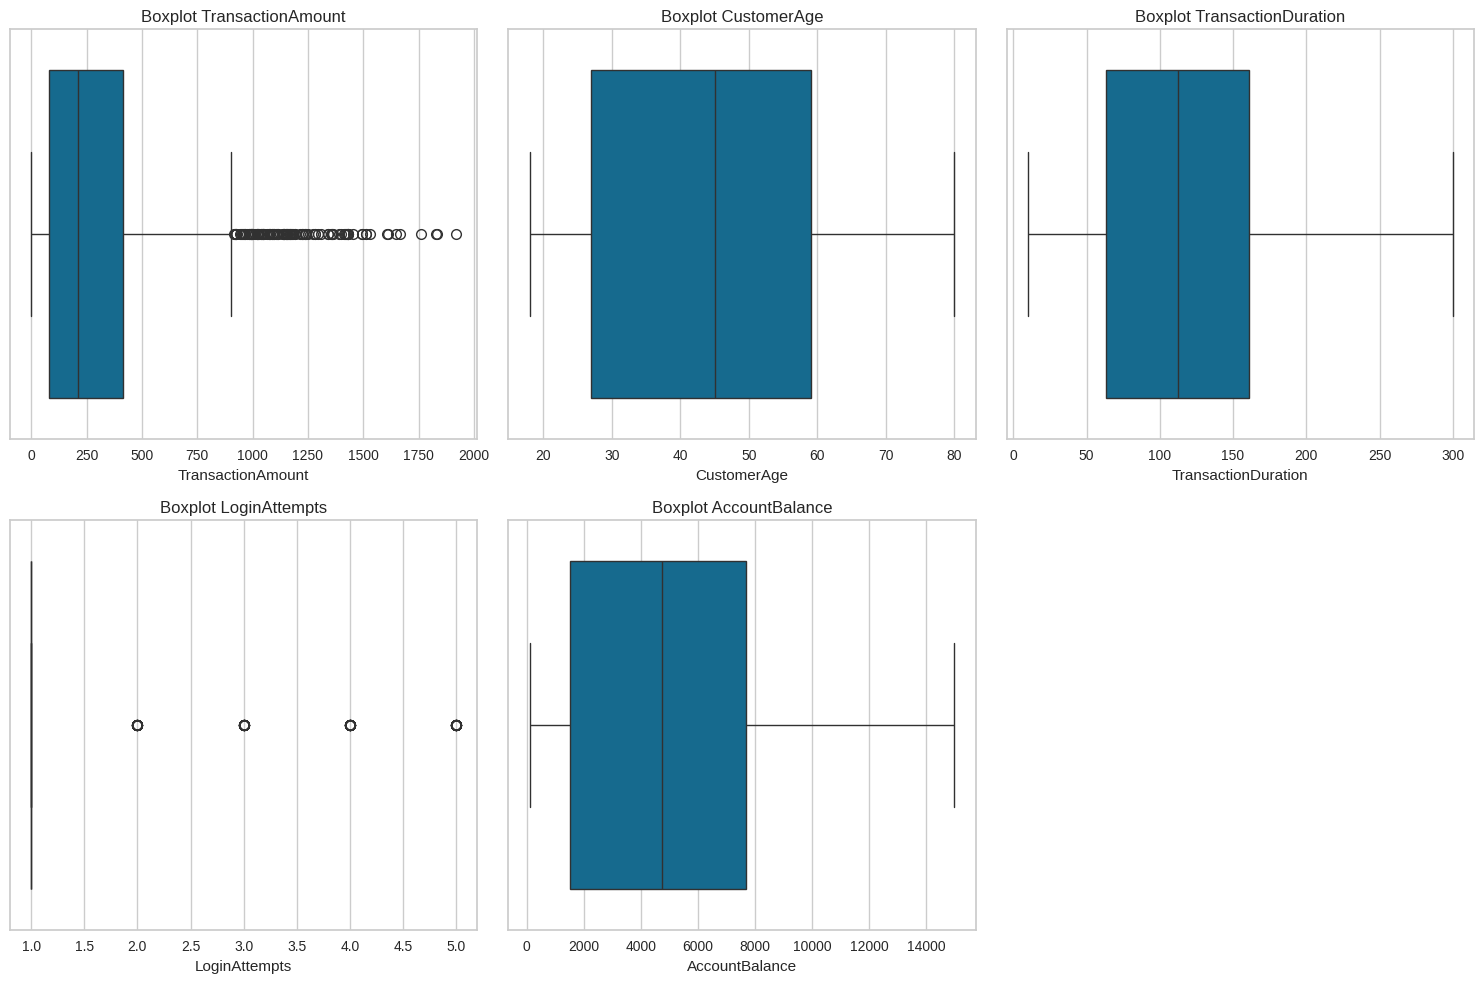

In [123]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Outlier terdapat pada TransactionAmount dan LoginAttempts. Outlier dalam TransactionAmount dapat menjadi indikasi transaksi bernilai besar yang jarang terjadi, sehingga perlu diatasi nantinya. Sementara itu, outlier dalam LoginAttempts bisa mengarah pada aktivitas mencurigakan seperti percobaan login berulang sehingga tidak akan dihapus karena bisa menjadi informasi penting.

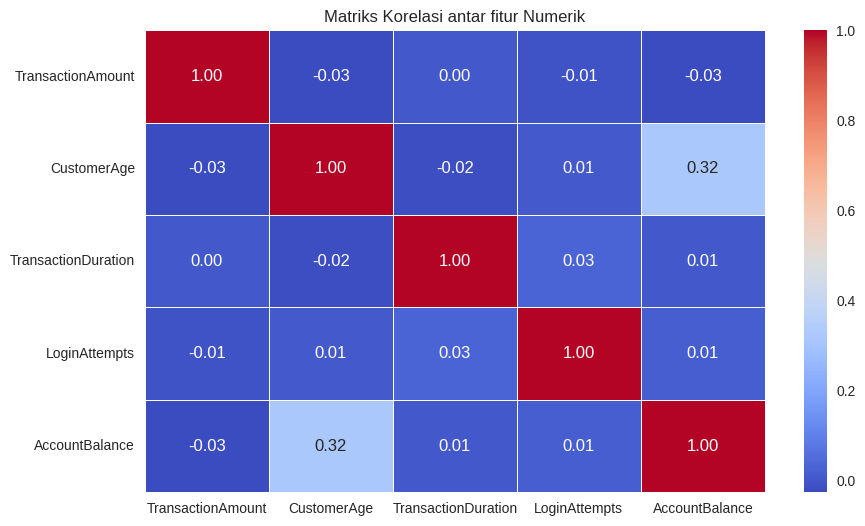

In [124]:
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi antar fitur Numerik")
plt.show()

Matriks korelasi menunjukkan bahwa tidak ada hubungan kuat antar fitur numerik dalam dataset ini. CustomerAge memiliki korelasi positif sedang dengan AccountBalance (0.32), yang menunjukkan bahwa semakin tua usia pelanggan, cenderung memiliki saldo akun lebih tinggi. Fitur lainnya memiliki korelasi sangat rendah atau mendekati nol, ini menandakan bahwa tidak ada hubungan linear yang signifikan di antara mereka.

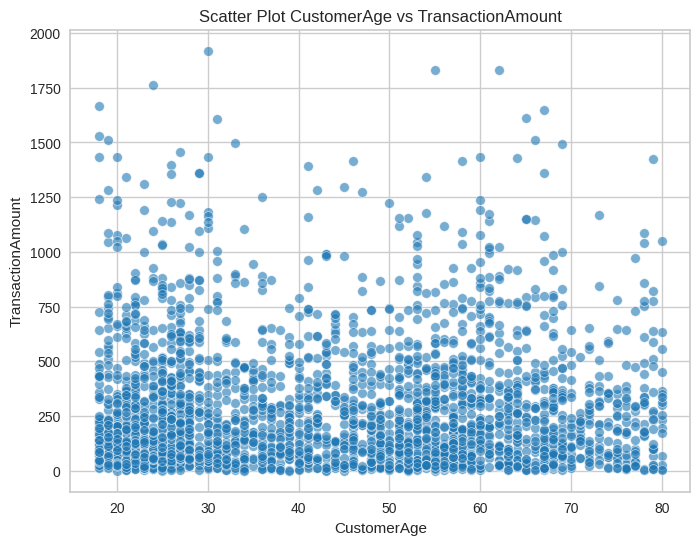

In [125]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="CustomerAge", y="TransactionAmount", color="#1f77b4", alpha=0.6)

plt.title("Scatter Plot CustomerAge vs TransactionAmount")
plt.xlabel("CustomerAge")
plt.ylabel("TransactionAmount")

plt.show()

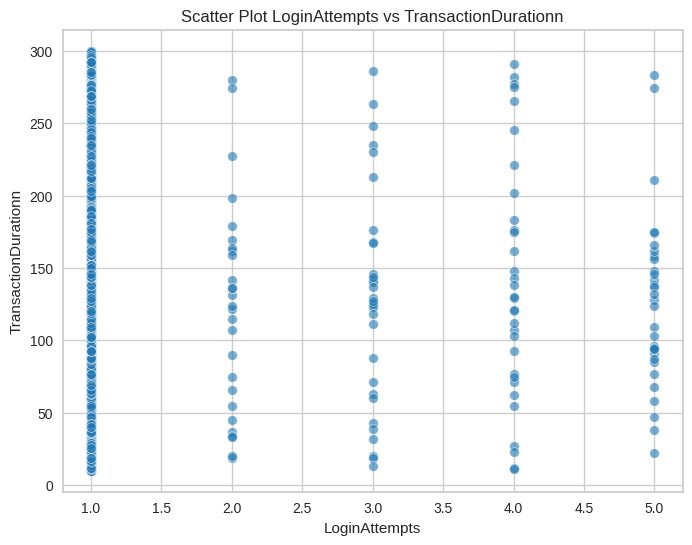

In [126]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="LoginAttempts", y="TransactionDuration", color="#1f77b4", alpha=0.6)

plt.title("Scatter Plot LoginAttempts vs TransactionDurationn")
plt.xlabel("LoginAttempts")
plt.ylabel("TransactionDurationn")

plt.show()

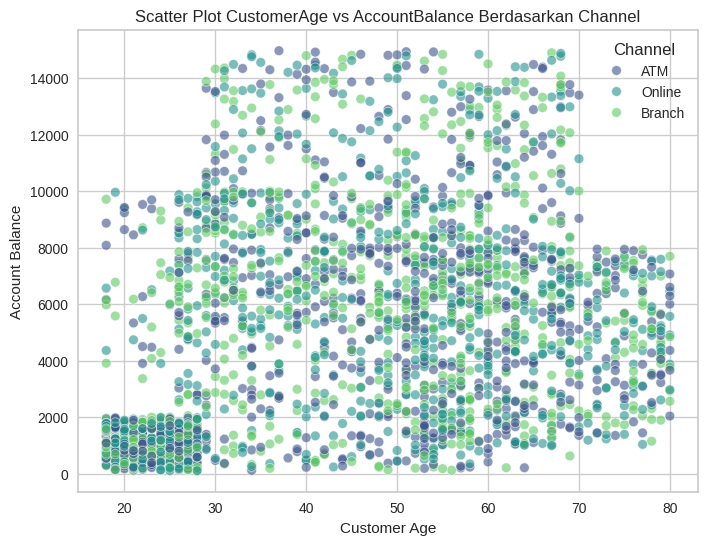

In [128]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="CustomerAge", y="AccountBalance", hue="Channel", palette="viridis", alpha=0.6)

plt.title("Scatter Plot CustomerAge vs AccountBalance Berdasarkan Channel")
plt.xlabel("Customer Age")
plt.ylabel("Account Balance")
plt.legend(title="Channel")

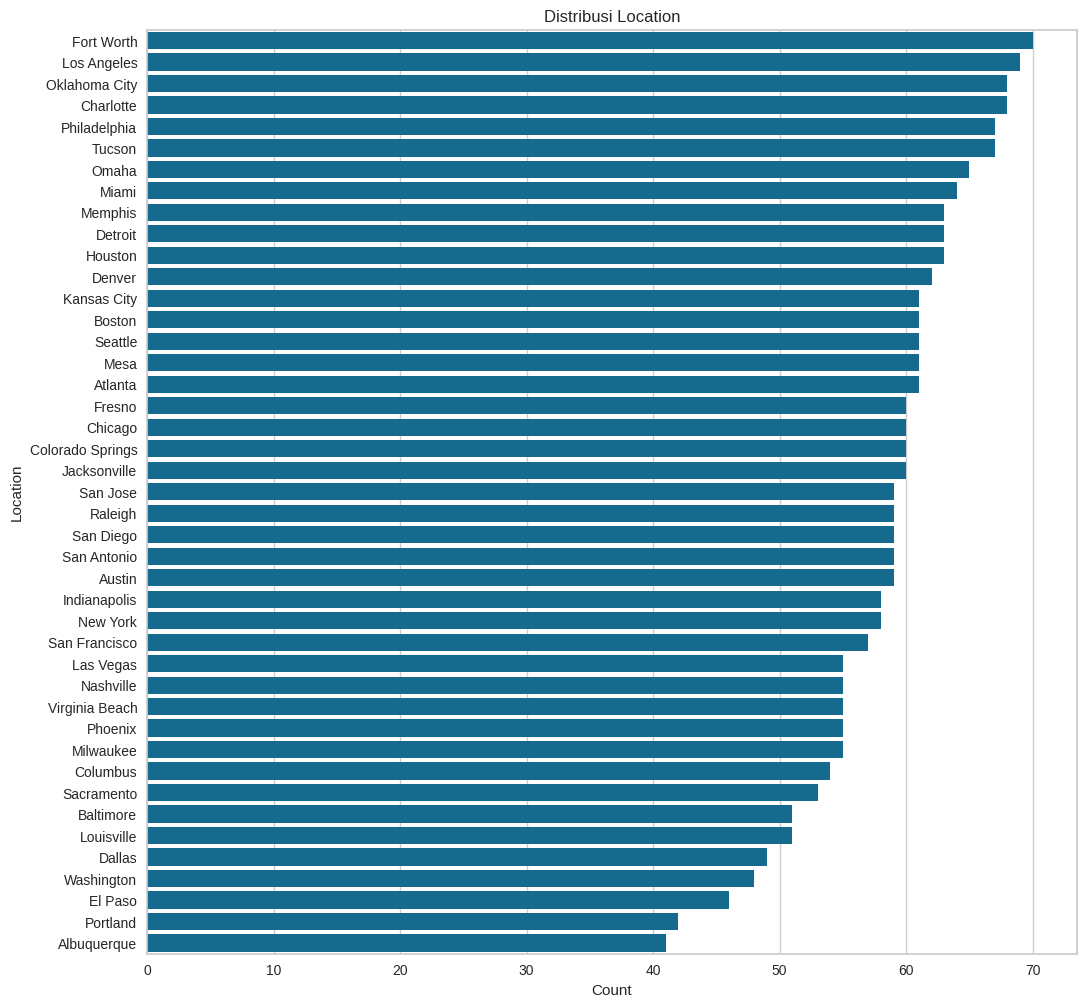

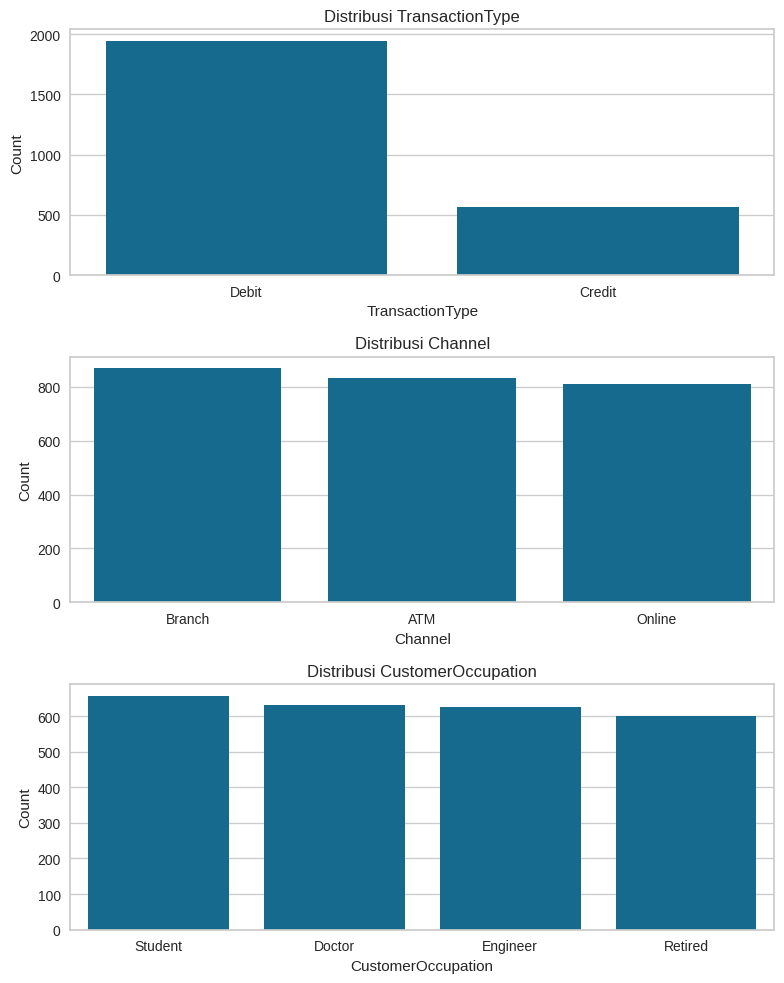

In [129]:
plt.figure(figsize=(12, 12))
sns.countplot(data=df, y="Location", order=df["Location"].value_counts().index)
plt.title("Distribusi Location")
plt.xlabel("Count")
plt.ylabel("Location")
plt.show()

fig, axes = plt.subplots(3, 1, figsize=(8, 10))
for i, col in enumerate(["TransactionType", "Channel", "CustomerOccupation"]):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Distribusi {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

- **Penanganan Missing Value**

Karena sebelumnya pada tahap EDA dicek tidak ada missing value pada dataset mana hal ini bisa dilewati.

- **Mengecek dan menghapus data yang duplikat**

In [130]:
print("Data duplikat:", df.duplicated().sum())

Data duplikat: 0


Tidak ada data duplikat dalam dataset ini.

- **Deteksi dan penanganan outlier**

In [131]:
# Menentukan batas outlier menggunakan IQR
Q1 = df['TransactionAmount'].quantile(0.25)
Q3 = df['TransactionAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_below = df[df['TransactionAmount'] < lower_bound].shape[0]
outliers_above = df[df['TransactionAmount'] > upper_bound].shape[0]
total_outliers = outliers_below + outliers_above

print(f"Jumlah outlier di bawah batas bawah: {outliers_below}")
print(f"Jumlah outlier di atas batas atas: {outliers_above}")
print(f"Total seluruh outlier: {total_outliers}")

Jumlah outlier di bawah batas bawah: 0
Jumlah outlier di atas batas atas: 113
Total seluruh outlier: 113


In [133]:
df['TransactionAmount'] = df['TransactionAmount'].apply(lambda x:
    lower_bound if x < lower_bound else
    upper_bound if x > upper_bound else
    x
)

outliers_after = df[(df['TransactionAmount'] < lower_bound) | (df['TransactionAmount'] > upper_bound)].shape[0]
print(f"Total outlier setelah penanganan outlier: {outliers_after}")

Total outlier setelah penanganan outlier: 0


Untuk menangani outlier pada TransactionAmount. Outlier dihitung menggunakan IQR, dan mendapatkan 113 data di atas batas maksimum. Penanganan dilakukan dengan mengganti nilai yang outlier, jika di bawah batas minimum, diganti batas minimum, dan jika di atas batas maksimum, diganti batas maksimum. Setelah penanganan, tidak ada lagi outlier dalam data.

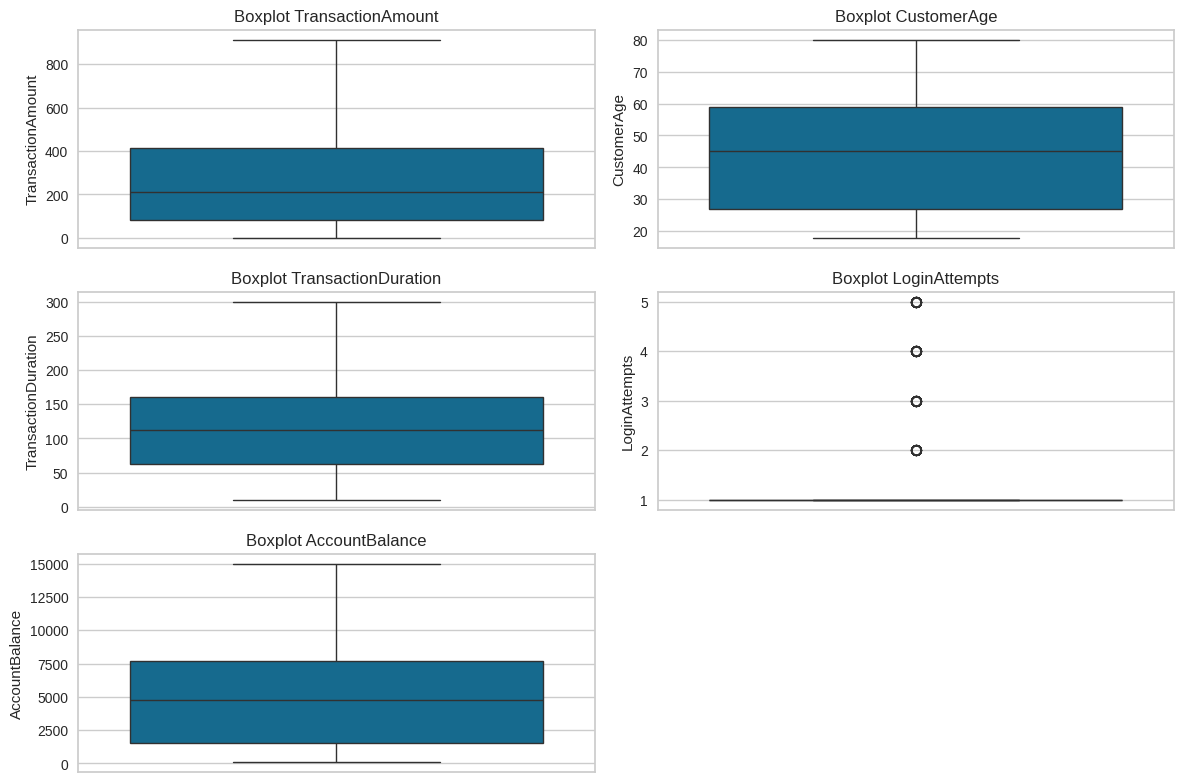

In [134]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

- **Binning**

Di sini, saya melakukan binning pada CustomerAge untuk melihat berapa banyak pelanggan yang termasuk dalam setiap kategori usia

In [135]:
bins = [0, 25, 45, 65, df["CustomerAge"].max()]  # Batas usia
labels = ["Muda", "Dewasa", "Paruh Baya", "Lanjut Usia"]  # Label yang lebih umum

df["AgeCategory"] = pd.cut(df["CustomerAge"], bins=bins, labels=labels, include_lowest=True)

In [136]:
df[["CustomerAge", "AgeCategory"]].head()

,CustomerAge,AgeCategory
0,70,Lanjut Usia
1,68,Lanjut Usia
2,19,Muda
3,26,Dewasa
4,26,Dewasa


<ipython-input-137-67bf5ec6043a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["AgeCategory"], palette="viridis")


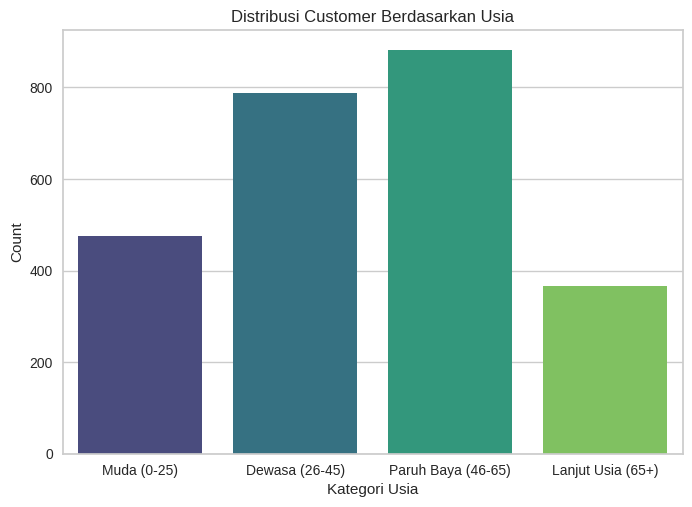

In [137]:
age_labels = {
    "Muda": "Muda (0-25)",
    "Dewasa": "Dewasa (26-45)",
    "Paruh Baya": "Paruh Baya (46-65)",
    "Lanjut Usia": "Lanjut Usia (65+)"
}

sns.countplot(x=df["AgeCategory"], palette="viridis")
plt.xlabel("Kategori Usia")
plt.ylabel("Count")
plt.title("Distribusi Customer Berdasarkan Usia")
plt.xticks(ticks=range(len(age_labels)), labels=age_labels.values())
plt.show()

- **Encoding data**

encoding pada data kategorikal menggunakan Label Encoding, yang mengubah nilai kategori menjadi angka.

In [138]:
categorical_features = ["TransactionType","Channel", "CustomerOccupation"]
df[categorical_features].head()

,TransactionType,Channel,CustomerOccupation
0,Debit,ATM,Doctor
1,Debit,ATM,Doctor
2,Debit,Online,Student
3,Debit,Online,Student
4,Credit,Online,Student


In [139]:
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Transform ke angka
    label_encoders[col] = le

In [140]:
df[categorical_features].head()

,TransactionType,Channel,CustomerOccupation
0,1,0,0
1,1,0,0
2,1,2,3
3,1,2,3
4,0,2,3


- **Standarisasi fitur numerik**



In [141]:
scaler = StandardScaler()

features_to_scale = ["TransactionAmount", "AccountBalance", "LoginAttempts", "CustomerAge", "TransactionDuration"]
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

- **Menghapus beberpa fitur**

Menghapus beberapa fitur agar tidak dimasukkan ke dalam dataset yang akan digunakan untuk model. Fitur-fitur ini dihapus karena bersifat unik atau tidak memberikan informasi yang relevan untuk prediksi.

In [142]:
columns_to_drop = ["TransactionID", "AccountID", "TransactionDate", "DeviceID", "IP Address", "MerchantID", "PreviousTransactionDate", "AgeCategory", "Location"]

df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [144]:
df.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,-1.074361,1,0,1.423718,0,-0.552443,-0.206794,-0.000537
1,0.362645,1,0,1.311287,0,0.305314,-0.206794,2.216472
2,-0.629153,1,2,-1.443277,3,-0.909842,-0.206794,-1.023534
3,-0.398176,1,2,-1.049768,3,-1.353017,-0.206794,0.885797
4,-1.076900,0,2,-1.049768,3,1.120184,-0.206794,0.593589


menyimpan data set ke df_cleaned

In [146]:
df_cleaned = df.copy()

In [147]:
df_cleaned

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,-1.074361,1,0,1.423718,0,-0.552443,-0.206794,-0.000537
1,0.362645,1,0,1.311287,0,0.305314,-0.206794,2.216472
2,-0.629153,1,2,-1.443277,3,-0.909842,-0.206794,-1.023534
3,-0.398176,1,2,-1.049768,3,-1.353017,-0.206794,0.885797
4,-1.076900,0,2,-1.049768,3,1.120184,-0.206794,0.593589
...,...,...,...,...,...,...,...,...
2507,2.267159,0,1,-0.656259,0,-0.152156,-0.206794,1.942606
2508,-0.132163,1,1,0.186975,0,0.819969,-0.206794,-1.245986
2509,-1.016666,1,1,0.636700,2,0.376794,-0.206794,-0.443928
2510,-0.392343,1,2,-1.218415,3,-1.438793,-0.206794,-0.855705


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Menggunakan algoritma kmeans
2. Latih model dengan data menggunakan algoritma tersebut.

In [148]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)

kmeans.fit(df_cleaned)
df_cleaned["Cluster"] = kmeans.labels_

In [149]:
df_cleaned

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Cluster
0,-1.074361,1,0,1.423718,0,-0.552443,-0.206794,-0.000537,1
1,0.362645,1,0,1.311287,0,0.305314,-0.206794,2.216472,2
2,-0.629153,1,2,-1.443277,3,-0.909842,-0.206794,-1.023534,4
3,-0.398176,1,2,-1.049768,3,-1.353017,-0.206794,0.885797,4
4,-1.076900,0,2,-1.049768,3,1.120184,-0.206794,0.593589,4
...,...,...,...,...,...,...,...,...,...
2507,2.267159,0,1,-0.656259,0,-0.152156,-0.206794,1.942606,0
2508,-0.132163,1,1,0.186975,0,0.819969,-0.206794,-1.245986,1
2509,-1.016666,1,1,0.636700,2,0.376794,-0.206794,-0.443928,1
2510,-0.392343,1,2,-1.218415,3,-1.438793,-0.206794,-0.855705,4


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

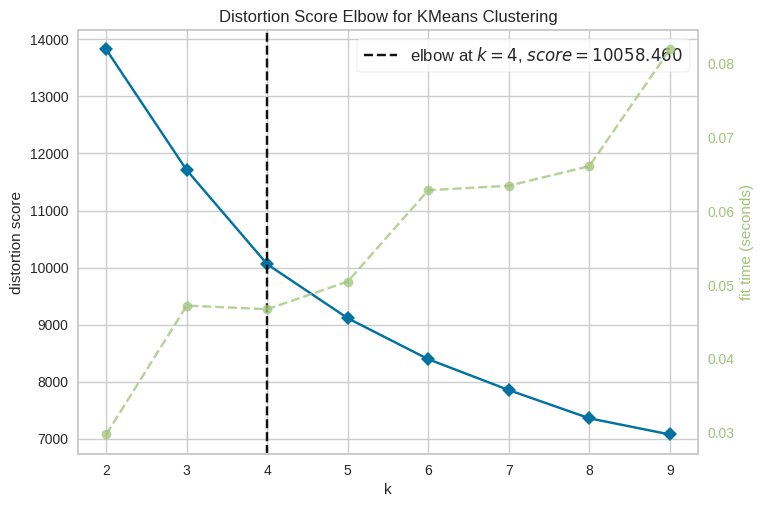

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [150]:
nocluster_cols = df_cleaned.drop(columns=["Cluster"], errors="ignore").columns

df_clustering = df_cleaned[nocluster_cols]
kmeans_elbow = KMeans(random_state=0, n_init=10)

visualizer = KElbowVisualizer(kmeans_elbow, k=(2, 10))
visualizer.fit(df_clustering)
best_k_elbow = visualizer.elbow_value_

visualizer.show()

In [151]:
print(f"\nJumlah cluster terbaik berdasarkan Elbow Method: {best_k_elbow}")


Jumlah cluster terbaik berdasarkan Elbow Method: 4


In [152]:
df_sil = df_cleaned.drop(columns=["Cluster"], errors="ignore")

K_range = np.arange(2, 12)

silhouette_scores = [
    silhouette_score(df_sil, KMeans(n_clusters=k, random_state=42, n_init=10).fit_predict(df_sil))
    for k in K_range
]

best_k_cluster = K_range[np.argmax(silhouette_scores)]

for k, score in zip(K_range, silhouette_scores):
    print(f"Jumlah Cluster={k} | Silhouette Score: {score:.3f}")


Jumlah Cluster=2 | Silhouette Score: 0.252
Jumlah Cluster=3 | Silhouette Score: 0.272
Jumlah Cluster=4 | Silhouette Score: 0.220
Jumlah Cluster=5 | Silhouette Score: 0.219
Jumlah Cluster=6 | Silhouette Score: 0.211
Jumlah Cluster=7 | Silhouette Score: 0.208
Jumlah Cluster=8 | Silhouette Score: 0.199
Jumlah Cluster=9 | Silhouette Score: 0.192
Jumlah Cluster=10 | Silhouette Score: 0.192
Jumlah Cluster=11 | Silhouette Score: 0.188


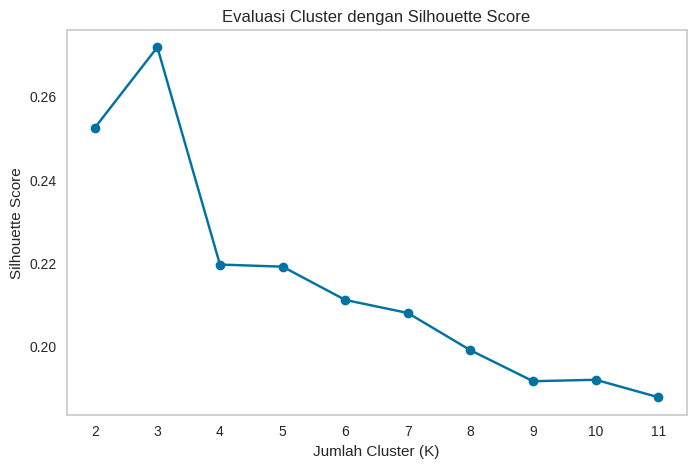

In [153]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, "o-b")
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Silhouette Score")
plt.title("Evaluasi Cluster dengan Silhouette Score")
plt.xticks(K_range)
plt.grid()
plt.show()

In [154]:
print(f"\nJumlah cluster terbaik berdasarkan Silhouette Score: {best_k_cluster}")


Jumlah cluster terbaik berdasarkan Silhouette Score: 3


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [155]:
df_processed = df_cleaned.drop(columns=["Cluster"], errors="ignore")

num_clusters = 3
initial_labels = KMeans(n_clusters=num_clusters, random_state=0, n_init=10).fit_predict(df_processed)

# Seleksi 5 fitur terbaik
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=0).fit(df_processed, initial_labels)
top_features = df_processed.iloc[:, np.argsort(rf_model.feature_importances_)[-5:]]

final_labels = KMeans(n_clusters=num_clusters, random_state=42, n_init=10).fit_predict(top_features)
print(f"Silhouette Score: {silhouette_score(top_features, final_labels):.4f}")

Silhouette Score: 0.3165


In [156]:
# Menampilkan fitur
selected_feature_names = df_processed.columns[np.argsort(rf_model.feature_importances_)[-5:]]
print("Fitur yang dipilih:", selected_feature_names)

Fitur yang dipilih: Index(['TransactionAmount', 'LoginAttempts', 'AccountBalance', 'CustomerAge',
       'CustomerOccupation'],
      dtype='object')


In [157]:
df_pca_transformed = PCA(n_components=2, random_state=0).fit_transform(
    PolynomialFeatures(degree=3, interaction_only=True, include_bias=False).fit_transform(top_features)
)

# Clustering & Evaluasi
final_labels_poly = KMeans(n_clusters=num_clusters, random_state=0, n_init=10).fit_predict(df_pca_transformed)
print(f"Silhouette Score (Poly + PCA): {silhouette_score(df_pca_transformed, final_labels_poly):.4f}")

Silhouette Score (Poly + PCA): 0.7493


disini diterapkan K-Means untuk clustering awal, lalu menggunakan RandomForestClassifier untuk menyeleksi 5 fitur paling signifikan. Clustering kemudian diterapkan ulang pada fitur yang dipilih, sebelum data ditransformasikan dengan PolynomialFeatures dan direduksi dimensinya menggunakan PCA. Pada tahap akhir, K-Means dijalankan kembali, dan menghasilkan Silhouette Score yang lebih tinggi dibandingkan tanpa seleksi fitur dan reduksi dimensi.

In [158]:
df_cleaned = df_cleaned.drop(columns=["Cluster"], errors="ignore")

In [159]:
df_cleaned["Cluster"] = final_labels_poly

In [160]:
df_cleaned.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Cluster
0,-1.074361,1,0,1.423718,0,-0.552443,-0.206794,-0.000537,0
1,0.362645,1,0,1.311287,0,0.305314,-0.206794,2.216472,0
2,-0.629153,1,2,-1.443277,3,-0.909842,-0.206794,-1.023534,1
3,-0.398176,1,2,-1.049768,3,-1.353017,-0.206794,0.885797,0
4,-1.076900,0,2,-1.049768,3,1.120184,-0.206794,0.593589,0


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

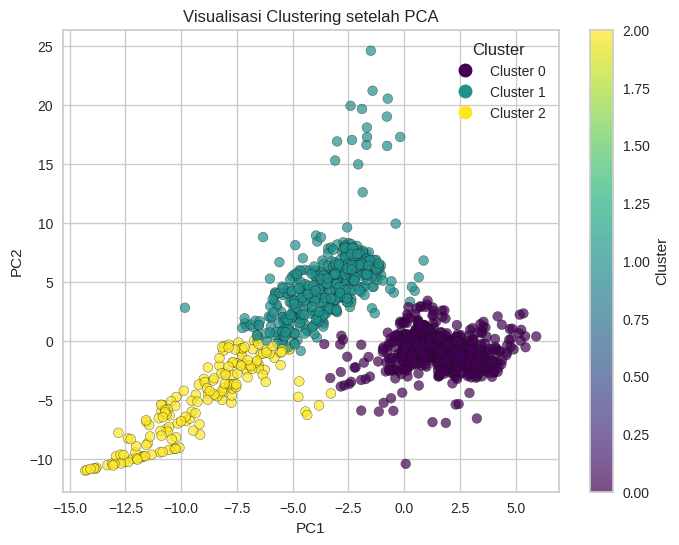

In [161]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_pca_transformed[:, 0], df_pca_transformed[:, 1], c=final_labels_poly, cmap='viridis', alpha=0.7, edgecolors='k')
plt.title("Visualisasi Clustering setelah PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")

legend_labels = {0: "Cluster 0", 1: "Cluster 1", 2: "Cluster 2"}
handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=scatter.cmap(scatter.norm(i))) for i in range(num_clusters)]
plt.legend(handles, [legend_labels[i] for i in range(num_clusters)], title="Cluster", loc="upper right")
plt.show()

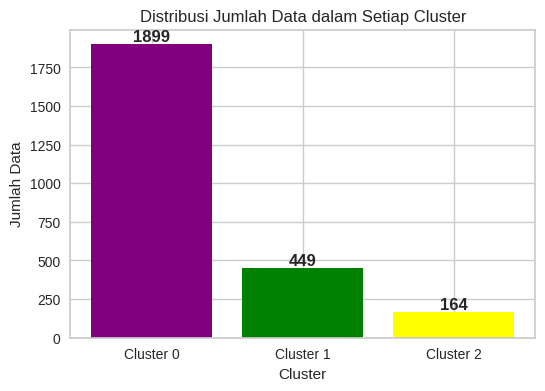

In [162]:
plt.figure(figsize=(6, 4))
unique, counts = np.unique(final_labels_poly, return_counts=True)
bars = plt.bar([legend_labels[i] for i in unique], counts, color=['purple', 'green', 'yellow'])
plt.xlabel("Cluster")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Jumlah Data dalam Setiap Cluster")

for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()

**Visualisasi cluster berdasarkan df_ori**(data asli/mentah bukan yang dinormalisasi)

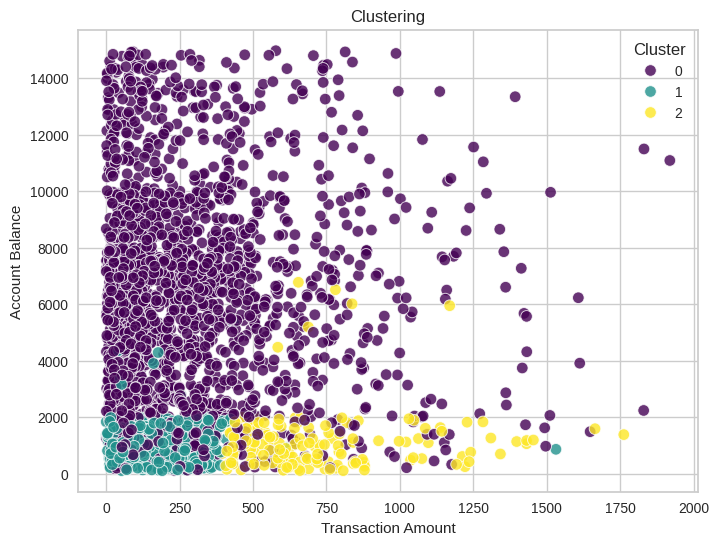

In [163]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_ori["TransactionAmount"],
    y=df_ori["AccountBalance"],
    hue=final_labels_poly,
    palette="viridis",
    s=70, alpha=0.8
)

plt.title(f"Clustering")
plt.xlabel("Transaction Amount")
plt.ylabel("Account Balance")
plt.legend(title="Cluster")
plt.show()

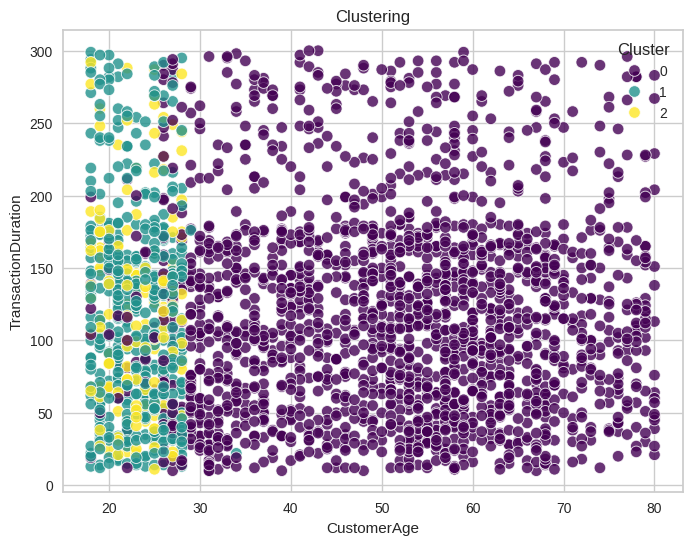

In [164]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_ori["CustomerAge"],
    y=df_ori["TransactionDuration"],
    hue=final_labels_poly,
    palette="viridis",
    s=70, alpha=0.8
)

plt.title(f"Clustering")
plt.xlabel("CustomerAge")
plt.ylabel("TransactionDuration")
plt.legend(title="Cluster")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [165]:
df_cleaned["Cluster"] = final_labels_poly

In [166]:
df_cleaned.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Cluster
0,-1.074361,1,0,1.423718,0,-0.552443,-0.206794,-0.000537,0
1,0.362645,1,0,1.311287,0,0.305314,-0.206794,2.216472,0
2,-0.629153,1,2,-1.443277,3,-0.909842,-0.206794,-1.023534,1
3,-0.398176,1,2,-1.049768,3,-1.353017,-0.206794,0.885797,0
4,-1.076900,0,2,-1.049768,3,1.120184,-0.206794,0.593589,0


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [167]:
for col in categorical_features:
    df_cleaned[col] = label_encoders[col].inverse_transform(df_cleaned[col])

# Fitur yang telah dinormalisasi
features_to_scale = ["TransactionAmount", "AccountBalance", "LoginAttempts", "CustomerAge", "TransactionDuration"]

# Inverse transform untuk fitur numerik
df_cleaned[features_to_scale] = scaler.inverse_transform(df_cleaned[features_to_scale])

In [168]:
df_cleaned.head()

,TransactionAmount,TransactionType,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Cluster
0,14.09,Debit,ATM,70.0,Doctor,81.0,1.0,5112.21,0
1,376.24,Debit,ATM,68.0,Doctor,141.0,1.0,13758.91,0
2,126.29,Debit,Online,19.0,Student,56.0,1.0,1122.35,1
3,184.50,Debit,Online,26.0,Student,25.0,1.0,8569.06,0
4,13.45,Credit,Online,26.0,Student,198.0,1.0,7429.40,0


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

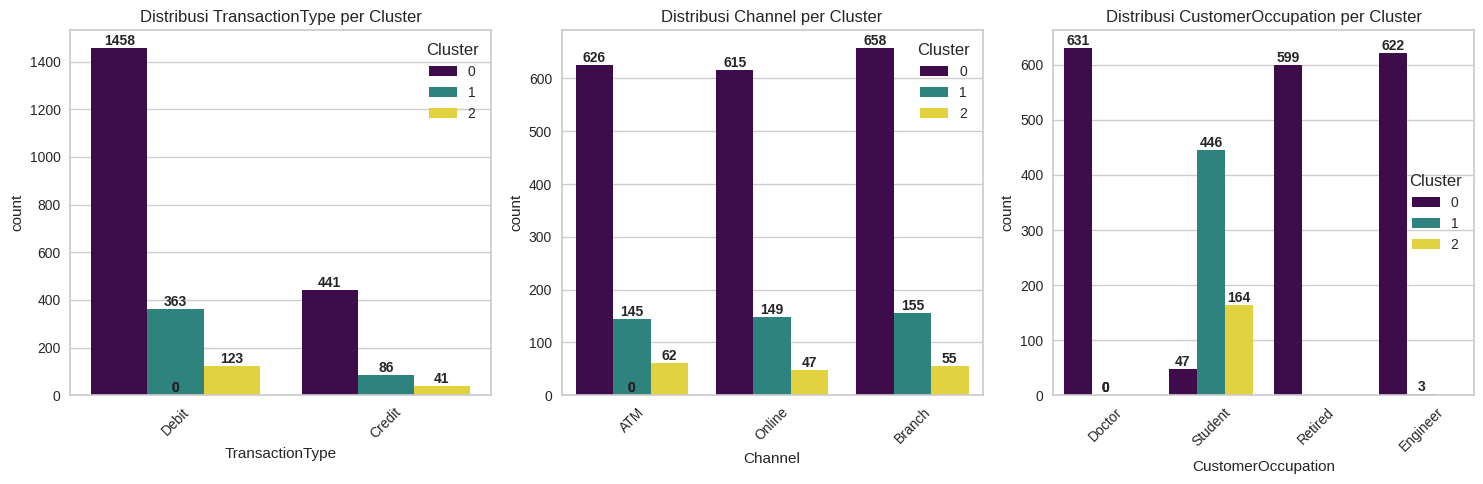

In [169]:
plt.figure(figsize=(15, 5))

def add_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.subplot(1, 3, 1)
ax1 = sns.countplot(data=df_cleaned, x="TransactionType", hue="Cluster", palette="viridis")
plt.title("Distribusi TransactionType per Cluster")
plt.xticks(rotation=45)
add_labels(ax1)

plt.subplot(1, 3, 2)
ax2 = sns.countplot(data=df_cleaned, x="Channel", hue="Cluster", palette="viridis")
plt.title("Distribusi Channel per Cluster")
plt.xticks(rotation=45)
add_labels(ax2)

plt.subplot(1, 3, 3)
ax3 = sns.countplot(data=df_cleaned, x="CustomerOccupation", hue="Cluster", palette="viridis")
plt.title("Distribusi CustomerOccupation per Cluster")
plt.xticks(rotation=45)
add_labels(ax3)

plt.tight_layout()
plt.show()

In [170]:
#min, max, mean
min_agg = df_cleaned.groupby("Cluster")[features_to_scale].agg("min")
max_agg = df_cleaned.groupby("Cluster")[features_to_scale].agg("max")
mean_agg = df_cleaned.groupby("Cluster")[features_to_scale].agg("mean")

#modus
mode_agg = df_cleaned.groupby("Cluster")[categorical_features].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0])

print("\033[1mMin Values:\033[0m\n", min_agg)
print("\n\033[1mMax Values:\033[0m\n", max_agg)
print("\n\033[1mMean Values:\033[0m\n", mean_agg)
print("\n\033[1mModus Values:\033[0m\n", mode_agg)

Min Values:
          TransactionAmount  AccountBalance  LoginAttempts  CustomerAge  \
Cluster                                                                  
0                     0.32          112.76            1.0         18.0   
1                     0.26          101.25            1.0         18.0   
2                   395.27          102.20            1.0         18.0   

         TransactionDuration  
Cluster                       
0                       10.0  
1                       12.0  
2                       11.0  

Max Values:
          TransactionAmount  AccountBalance  LoginAttempts  CustomerAge  \
Cluster                                                                  
0                913.49125        14977.99            5.0         80.0   
1                913.49125         5976.00            5.0         34.0   
2                913.49125         6776.41            1.0         28.0   

         TransactionDuration  
Cluster                       
0             

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# Interpretasi
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0: Nasabah Senior dan Stabil Finansial
- **Usia rata-rata:** 51.63 tahun (paling tinggi di antara cluster lainnya)
- **Saldo rekening:** 6407.42 (tertinggi diantara cluster lainnya)
- **Rata-rata nilai transaksi:** 281.01
- **Rata-rata jumlah login attempts:** 1.12
- **Rata-rata durasi transaksi:** 119.13 detik
- **Modus transaksi:** Debit
- **Modus channel:** Branch (cabang bank)
- **Profesi dominan:** Doctor

- **Analisis:** Nasabah dalam cluster ini memiliki stabilitas finansial tinggi dengan saldo rekening terbesar dan mayoritas berusia di atas 50 tahun, menunjukkan mereka berada di tahap akhir karier atau pensiun. Mereka lebih nyaman melakukan transaksi langsung di cabang bank dibandingkan menggunakan ATM atau layanan digital. Dengan dominasi transaksi debit. Jumlah percobaan login yang rendah, sementara durasi transaksi yang stabil mengindikasikan pola keuangan yang teratur dan tidak mencurigakan. Secara keseluruhan, kelompok ini memiliki indikasi fraud yang sangat rendah karena pola transaksi mereka cenderung wajar dan terstruktur.

## Cluster 1: Nasabah muda yang baru mulai membangun kestabilan finansial.
- **Usia rata-rata:** 23.09 tahun
- **Saldo rekening:** 1097.94 (relatif kecil dibandingkan cluster lain)
- **Rata-rata nilai transaksi:** 163.93 (terendah)
- **Rata-rata jumlah login attempts:** 1.18
- **Rata-rata durasi transaksi:** 120.49 detik
- **Modus transaksi:** Debit
- **Modus channel:** Branch (cabang bank)
- **Profesi dominan:** Student

- **Analisis:** Cluster ini terdiri dari mahasiswa muda yang masih dalam tahap awal membangun kestabilan finansial, dengan saldo rekening yang relatif rendah karena mungkin sebagian besar masih bergantung pada uang saku atau belum memiliki penghasilan tetap. Meskipun berasal dari generasi digital, mereka lebih sering menggunakan cabang bank untuk bertransaksi, menunjukkan bahwa mereka kurang dengan layanan digital banking atau lebih nyaman dengan bantuan teller. Jumlah percobaan login mereka sedikit lebih tinggi dibandingkan Cluster 0, mengindikasikan adanya kendala kecil dalam mengakses akun, namun tidak dalam skala mencurigakan. Dengan durasi transaksi yang normal dan pola penggunaan yang konservatif, indikasi fraud dalam cluster ini tergolong rendah.

## Cluster 2: Nasabah Muda dengan Aktivitas Transaksi Tinggi
 **Usia rata-rata:** 23.12 tahun
- **Saldo rekening:** 1136.93
- **Rata-rata nilai transaksi:** 660.27 (lebih tinggi dibanding Cluster 1)
- **Rata-rata jumlah login attempts:** 1.00
- **Rata-rata durasi transaksi:** 123.19 detik
- **Modus transaksi:** Debit
- **Modus channel:** ATM
- **Profesi dominan:** Student
- **Analisis:** Cluster ini juga terdiri dari nasabah muda, tetapi dengan pola transaksi yang jauh lebih aktif dibandingkan Cluster 1, meskipun saldo rekening tidak tinggi. Mereka dalam menggunakan ATM sebagai channel utama, menunjukkan bahwa mereka lebih mandiri dalam mengakses layanan perbankan dan mulai terbiasa dengan transaksi digital. Namun, tingginya jumlah transaksi dengan saldo yang kecil dapat menjadi indikasi strukturisasi transaksi, yang sering dikaitkan dengan penyalahgunaan rekening. Selain itu, penggunaan ATM sebagai channel meningkatkan risiko kejahatan atau penipuan berbasis ATM. Durasi transaksi yang lebih panjang juga bisa menandakan pola otomatisasi atau aktivitas yang mencurigakan. Indikasi Fraud pada cluster ini tergolong tinggi dari cluster lainnya.  terutama karena tingginya jumlah nilai transaksi dengan saldo rendah, penggunaan ATM yang lebih rentan terhadap kejahatan perbankan, serta pola transaksi yang bisa mengarah pada aktivitas tidak wajar.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [171]:
df_cleaned.to_csv("dataset_klasifikasi.csv", index=False)